In [1]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
    "text.latex.preamble": r"\usepackage{amsmath}"
})

In [2]:
df = pd.read_csv('runtime_tokendata_benchmarks.csv')
df = df[~df['Problem Name'].str.contains('wikipedia')]

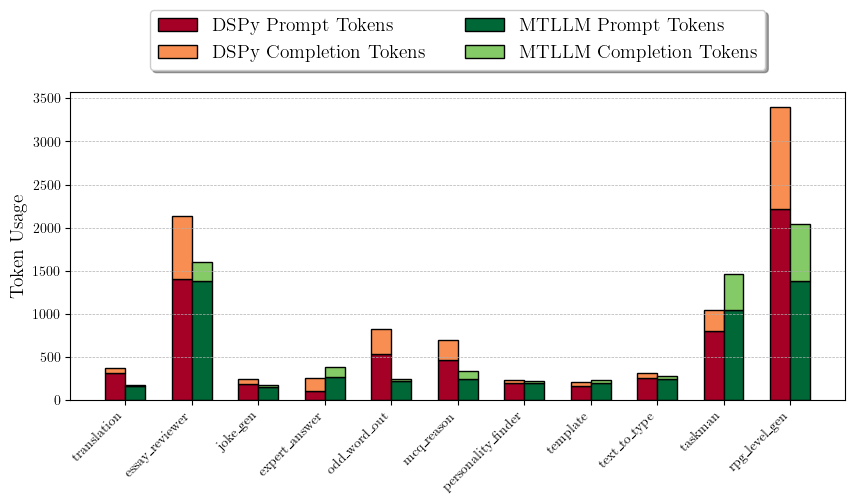

In [3]:
problems = df['Problem Name'].unique()
implementations = df['Implementation'].unique()

data = {}
for problem in problems:
    data[problem] = df[df['Problem Name'] == problem]

# Number of bars per problem
n_bars = len(implementations)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar width and bar positions
bar_width = 0.3
bar_positions = np.arange(len(problems))



# Plotting each implementation
for i, implementation in enumerate(implementations):
    prompt_tokens = [data[problem][data[problem]['Implementation'] == implementation]['Prompt Tokens'].values[0] for problem in problems]
    completion_tokens = [data[problem][data[problem]['Implementation'] == implementation]['Completion Token'].values[0] for problem in problems]
    bottom_tokens = [0] * len(problems)
    
    cmap = plt.get_cmap('RdYlGn')

    if implementation == 'DSPy':
        prompt_color = cmap(0.0)
        completion_color = cmap(0.25)
    else :
        prompt_color = cmap(1.0)
        completion_color = cmap(0.75)

    ax.bar(bar_positions + i * bar_width, prompt_tokens, bar_width, label=f'{implementation} Prompt Tokens', color = prompt_color, edgecolor='black')
    ax.bar(bar_positions + i * bar_width, completion_tokens, bar_width, bottom=prompt_tokens, label=f'{implementation} Completion Tokens', color = completion_color,edgecolor='black')

# Set x-ticks and labels
ax.set_xticks(bar_positions + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(problems, rotation=45, ha='right')

# Set labels and title
ax.set_ylabel('Token Usage', fontsize=14)
# ax.set_title('Token Usage by Problem and Implementation')
ax.legend(loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.3), ncol=2)

plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.savefig('token_usage_benchmarks.png', dpi=300, bbox_inches='tight')
plt.show()


[np.float64(6.458436), np.float64(16.006232), np.float64(4.707879), np.float64(7.11142), np.float64(8.989907), np.float64(4.060738), np.float64(1.221893), np.float64(1.315861), np.float64(1.150345), np.float64(6.495577), np.float64(19.96269)]
[np.float64(1.540778), np.float64(9.717227), np.float64(0.851867), np.float64(3.085123), np.float64(0.947746), np.float64(2.071618), np.float64(2.069936), np.float64(1.095968), np.float64(1.449874), np.float64(13.527589), np.float64(13.501024)]


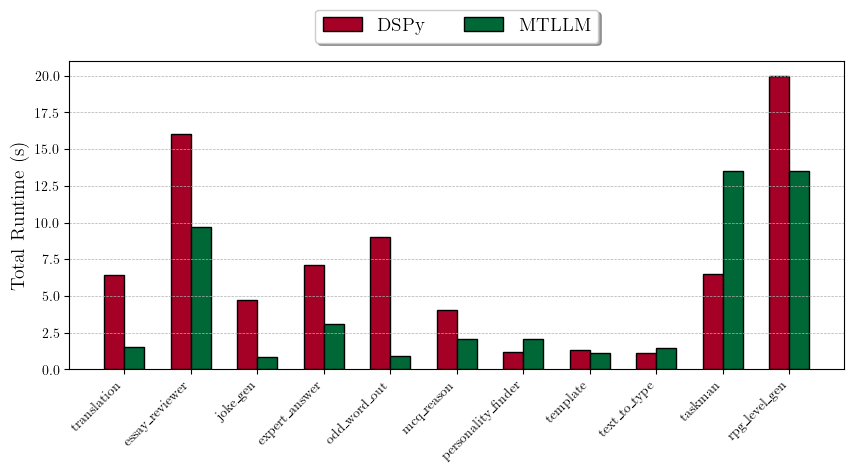

In [4]:
# Number of bars per problem
n_bars = len(implementations)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar width and bar positions
bar_width = 0.3
bar_positions = np.arange(len(problems))

# Plotting each implementation
for i, implementation in enumerate(implementations):
    total_runtime = [data[problem][data[problem]['Implementation'] == implementation]['Total Runtime'].values[0] for problem in problems]
    print(total_runtime)
    bottom_tokens = [0] * len(problems)
    cmap = plt.get_cmap('RdYlGn')
    if implementation == 'DSPy':
        runtime_color = cmap(0.0) 
    if implementation == 'MTLLM':
        runtime_color = cmap(1.0)
        
    ax.bar(bar_positions + i * bar_width, total_runtime, bar_width, label=f'{implementation}',color = runtime_color, edgecolor='black')

# Set x-ticks and labels
ax.set_xticks(bar_positions + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(problems, rotation=45, ha='right')

# Set labels and title
ax.set_ylabel('Total Runtime (s)', fontsize=14)
# ax.set_title('Total Runtime by Problem and Implementation')
ax.legend(loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.set_xlabel("")

plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.savefig('runtime_benchmarks.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_104650/2854050756.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha='right')
/tmp/ipykernel_104650/2854050756.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_labels)  # Set new y-tick labels


Text(0, 0.0, '0')


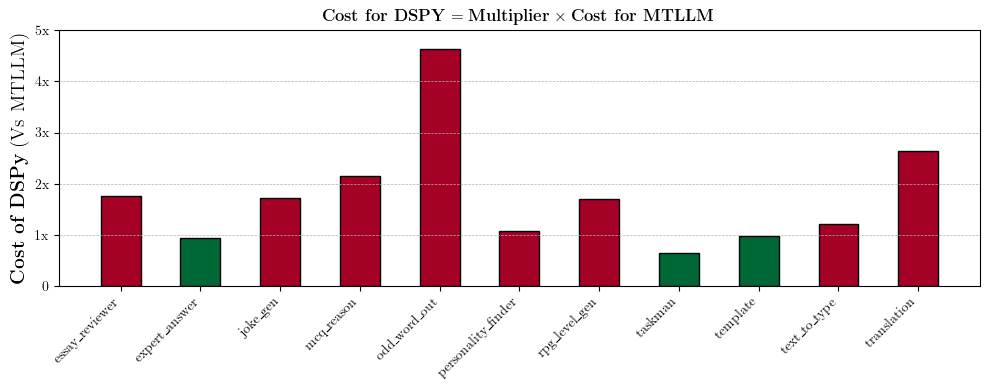

In [5]:
# Pivot the DataFrame to have Problem Name as index and Implementation as columns
df_pivot = df.pivot(index="Problem Name", columns="Implementation", values="Cost")

# Compute the cost difference (DSPy - MTLLM)
df_pivot['Cost Difference'] = ((df_pivot['DSPy'] ) / df_pivot['MTLLM'])
# df_pivot['Cost Difference'] = ((df_pivot['DSPy'] - df_pivot['MTLLM']) / df_pivot['DSPy']) *100

# Normalize the cost difference for coloring
norm = plt.Normalize(df_pivot['Cost Difference'].min(), df_pivot['Cost Difference'].max())
colors = plt.cm.RdYlGn(norm(df_pivot['Cost Difference']))

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(df_pivot.index, df_pivot['Cost Difference'], edgecolor='black', linewidth=1.0, width=0.5)

for i,bar in enumerate(bars):
    if df_pivot['Cost Difference'][df_pivot.index[i]] >= 1 :
        bar.set_facecolor(plt.cm.RdYlGn(0.0))
    else :
        bar.set_facecolor(plt.cm.RdYlGn(1.0))
#     bar.set_edgecolor='black'
#     bar.set_linewidth=2

# Add colorbar
# sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Cost Difference')

# Set labels and title
ax.set_ylim(0,5)
ax.set_title(r'\textbf{$ \text{Cost for DSPY} = \text{Multiplier} \times \text{Cost for MTLLM} $}')
ax.set_xlabel('')
ax.set_ylabel(r'\textbf{Cost of DSPy} (Vs MTLLM)', fontsize=14)
ax.set_xticklabels(df_pivot.index, rotation=45, ha='right')
y_ticks = ax.get_yticks()  # Get current y-tick locations
custom_labels = [(f'{int(i)}x' if int(i)!=0 else 0) for i in (y_ticks)]  # Create custom labels

ax.set_yticklabels(custom_labels)  # Set new y-tick labels
ylabels = ax.get_yticklabels()
print(ylabels[0])
ax.grid(axis='y')

plt.grid(axis='y',linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.savefig('cost_benchmarks.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
df_pivot

Implementation,DSPy,MTLLM,Cost Difference
Problem Name,,,
essay_reviewer,0.018020,0.010175,1.771007
expert_answer,0.002850,0.003020,0.943709
joke_gen,0.001880,0.001090,1.724771
mcq_reason,0.005735,0.002675,2.143925
odd_word_out,0.007015,0.001515,4.630363
personality_finder,0.001525,0.001400,1.089286
rpg_level_gen,0.028770,0.016785,1.714030
taskman,0.007565,0.011465,0.659834
template,0.001460,0.001480,0.986486
